<a href="https://colab.research.google.com/github/ccrespobarreda-ctrl/TFM/blob/main/Limpieza%20de%20datos_verisi%C3%B3n_Cris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Librerías y cargado del dataset



In [4]:
#Librerías
from google.colab import drive
import pandas as pd
import numpy as np

In [5]:
# Se carga el dataset a través de Drive
drive.mount('/content/drive')

ruta = '/content/drive/MyDrive/Copia de Dataset_sin_tratar.csv'
dataset_original = pd.read_csv(ruta,encoding='Latin-1')

Mounted at /content/drive


#2. Exploración básica

In [6]:
# Información general del dataset
dataset_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(324), int64(4), object(2)
memory usage: 1.1+ GB


In [7]:
# Dimensiones del dataset
print(f"Filas: {dataset_original.shape[0]}, Columnas: {dataset_original.shape[1]}")

Filas: 441456, Columnas: 330


In [8]:
#Ver los nombres de las columnas:

dataset_original.columns

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENUM',
       ...
       '_PAREC1', '_PASTAE1', '_LMTACT1', '_LMTWRK1', '_LMTSCL1', '_RFSEAT2',
       '_RFSEAT3', '_FLSHOT6', '_PNEUMO2', '_AIDTST3'],
      dtype='object', length=330)

In [9]:
#Para observar las primera 15/300 características del dataset
list(dataset_original.columns)[:15]

['_STATE',
 'FMONTH',
 'IDATE',
 'IMONTH',
 'IDAY',
 'IYEAR',
 'DISPCODE',
 'SEQNO',
 '_PSU',
 'CTELENUM',
 'PVTRESD1',
 'COLGHOUS',
 'STATERES',
 'CELLFON3',
 'LADULT']

In [10]:
# Ver las primeras filas
dataset_original.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,1292015,1,29,2015,1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,1202015,1,20,2015,1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,2012015,2,1,2015,1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,1142015,1,14,2015,1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,1142015,1,14,2015,1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [11]:
#Resumen estadístico de las columnas numéricas:

dataset_original.describe()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
count,441456.000000,441456.000000,4.414560e+05,441456.000000,441456.000000,441456.000000,441456.000000,4.414560e+05,4.414560e+05,254645.0,...,441456.000000,441456.000000,438657.000000,438657.000000,438657.000000,441456.000000,441456.000000,157954.000000,157954.000000,398069.000000
mean,29.968715,6.359676,6.563745e+06,6.416803,14.492729,2015.024725,1115.040457,2.015005e+09,2.015005e+09,1.0,...,3.494124,2.742695,2.716879,2.815149,3.652717,1.824624,1.887028,2.290705,2.412259,1.970156
std,16.034710,3.487131,3.488675e+06,3.492082,8.335468,0.155286,35.746794,4.113443e+03,4.113443e+03,0.0,...,2.398322,2.449676,1.324145,1.356101,1.266730,2.360812,2.351387,2.518086,2.778032,1.441119
min,1.000000,1.000000,1.012016e+06,1.000000,1.000000,2015.000000,1100.000000,2.015000e+09,2.015000e+09,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,3.232015e+06,3.000000,8.000000,2015.000000,1100.000000,2.015002e+09,2.015002e+09,1.0,...,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,29.000000,6.000000,6.242015e+06,6.000000,14.000000,2015.000000,1100.000000,2.015004e+09,2.015004e+09,1.0,...,3.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,44.000000,9.000000,1.002202e+07,10.000000,21.000000,2015.000000,1100.000000,2.015007e+09,2.015007e+09,1.0,...,4.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,72.000000,12.000000,1.231202e+07,12.000000,31.000000,2016.000000,1200.000000,2.015023e+09,2.015023e+09,1.0,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [12]:
# Número total de filas
total_filas = len(dataset_original)

# Contar valores únicos por columna
unicos = dataset_original.nunique()

# Crear un DataFrame con los conteos y los porcentajes
resumen_unicos = pd.DataFrame({
    'Valores_unicos': unicos,
    'Porcentaje_unicos': (unicos / total_filas) * 100
})

# Opcional: redondear el porcentaje a 2 decimales
resumen_unicos['Porcentaje_unicos'] = resumen_unicos['Porcentaje_unicos'].round(2)

# Mostrar el resultado
resumen_unicos

resumen_unicos['Tipo'] = dataset_original.dtypes
resumen_unicos

,Valores_unicos,Porcentaje_unicos,Tipo
_STATE,53,0.01,float64
FMONTH,12,0.00,float64
IDATE,415,0.09,int64
IMONTH,12,0.00,int64
IDAY,31,0.01,int64
...,...,...,...
_RFSEAT2,3,0.00,float64
_RFSEAT3,3,0.00,float64
_FLSHOT6,3,0.00,float64
_PNEUMO2,3,0.00,float64


In [13]:
# Número total de filas
total_filas = len(dataset_original)

# Calcular valores nulos y porcentaje
nulos = dataset_original.isnull().sum()
porcentaje_nulos = (nulos / total_filas) * 100

# Crear un DataFrame con ambos
resumen_nulos = pd.DataFrame({
    'Valores_nulos': nulos,
    'Porcentaje_nulos': porcentaje_nulos.round(2)
})

# Ordenar de mayor a menor porcentaje de nulos
resumen_nulos = resumen_nulos.sort_values('Porcentaje_nulos', ascending=False)

# Mostrar resultado (¡ahora incluye TODAS las columnas!)
resumen_nulos

,Valores_nulos,Porcentaje_nulos
QLHLTH2,441456,100.00
PAINACT2,441456,100.00
QLMENTL2,441456,100.00
QLSTRES2,441456,100.00
COLGHOUS,441411,99.99
...,...,...
_RFSEAT2,0,0.00
_RFSEAT3,0,0.00
IDATE,0,0.00
FMONTH,0,0.00


In [14]:
# La variable target es 'DIABETE3', que indica el estado de diabetes del encuestado.
#   1 = Sí, tiene diabetes
#   2 = Sí, pero solo durante el embarazo (gestacional) → generalmente excluido en análisis de diabetes tipo 2
#   3 = No, no tiene diabetes
#   4 = Sí, prediabetes o "borderline" (nivel elevado de azúcar, pero no diagnóstico de diabetes)
#   7 = No sabe / No está seguro
#   9 = Se negó a responder
#
# Para el análisis/modelado, nos interesan únicamente las clases:
#   - 1 → "Sí" (diabetes)
#   - 3 → "No" (sin diabetes)
#   - 4 → "Prediabetes"
#
# Los valores 2, 7 y 9 suelen tratarse como no utilizables o como valores faltantes, dependiendo del objetivo.

total = len(dataset_original)
porcentaje_target = (dataset_original['DIABETE3'].value_counts() / total) * 100

# Mostrar conteos y porcentajes, ordenados por valor de la categoría
conteo = dataset_original['DIABETE3'].value_counts().sort_index()
porcentaje = porcentaje_target.sort_index().round(2)

print("Conteo y porcentaje de cada categoría en DIABETE3:")
for val in conteo.index:
    print(f"{val}: {conteo[val]} ({porcentaje[val]}%)")

Conteo y porcentaje de cada categoría en DIABETE3:
1.0: 57256 (12.97%)
2.0: 3608 (0.82%)
3.0: 372104 (84.29%)
4.0: 7690 (1.74%)
7.0: 598 (0.14%)
9.0: 193 (0.04%)


#3. Limpieza y filtrado

In [15]:
# Se eliminan algunas características que no aportan valor al modelo (razonado en el documento: 1. Cribado de columnas)
columnas_para_eliminar = '''
_STATE, FMONTH, IDATE, IMONTH, IDAY, IYEAR, DISPCODE, SEQNO, _PSU, QSTVER, QSTLANG, MSCODE, _STSTR, _STRWT, _RAWRAKE, _WT2RAKE, _CLLCPWT, _DUALUSE, _DUALCOR, _LLCPWT, CTELENUM, CELLFON3,
CTELNUM1, CELLFON2, CADULT, CCLGHOUS, CSTATE, LANDLINE, NUMPHON2, CPDEMO1, INTERNET, PVTRESD1, COLGHOUS, STATERES, LADULT, NUMADULT, NUMMEN, NUMWOMEN, PVTRESD2, HHADULT, HLTHPLN1, PERSDOC2,
MEDCOST, CHECKUP1, RENTHOM1, NUMHHOL2, CHILDREN, INCOME2, CDHELP, CDSOCIAL, _CHLDCNT, _INCOMG, DIABAGE2, CVDINFR4, CVDCRHD4, CVDSTRK3, CHCKIDNY, PDIABTST, PREDIAB1, INSULIN, FEETCHK2,
DOCTDIAB, CHKHEMO3, FEETCHK, EYEEXAM, DIABEYE, DIABEDU, MARITAL, EDUCA, VETERAN3, EMPLOY1, SEATBELT, CDDISCUS, SCNTMNY1, SCNTMEL1, SCNTPAID, SCNTWRK1, SCNTLPAD, SCNTLWK1, SXORIENT, TRNSGNDR,
RCSGENDR, RCSRLTN2, EMTSUPRT, LSATISFY, ADPLEASR, ADDOWN, MISTMNT, _EDUCAG, _RFSEAT2, _RFSEAT3, _LMTWRK1, _LMTSCL1, CAREGIV1, CRGVREL1, CRGVLNG1, CRGVHRS1, CRGVPRB1, CRGVPERS, CRGVHOUS,
CRGVMST2, CRGVEXPT, CDHOUSE, CDASSIST, WEIGHT2, HEIGHT3, HTIN4, HTM4, WTKG3, _BMI5, _RFBMI5, STOPSMK2, LASTSMK2, USENOW3, _SMOKER3, _RFSMOK3, ALCDAY5, DRNK3GE5, MAXDRNKS, DRNKANY5, DROCDY3_,
_RFBING5, _DRNKWEK, _RFDRHV5, FVGREEN, ARTHEXER, FVORANG, VEGETAB1, GRENDAY_, ORNGDAY_, VEGEDA1_, _MISVEGN, _VEGLT1, _VEG23, _VEGETEX, FTJUDA1_, FRUTDA1_, FRUITJU1, FRUIT1, _MISFRTN, _FRTLT1, _FRT16,
_FRUITEX, FVBEANS, EXERANY2, EXRACT11, EXRACT21, EXEROFT2, EXERHMM2, ADMOVE, EXACTOT1, EXACTOT2, _TOTINDA, METVL11_, METVL21_, MAXVO2_, FC60_, ACTIN11_, ACTIN21_, PADUR1_, PADUR2_, PAFREQ1_,
PAFREQ2_, _MINAC11, _MINAC21, STRFREQ_, PAMIN11_, PAMIN21_, PA1MIN_, PAVIG11_, PAVIG21_, PA1VIGM_, _PA150R2, _PA300R2, _PA30021, _PASTRNG, _PAREC1, _PASTAE1, _LMTACT1, LMTJOIN3, ARTHSOCL,
JOINPAIN, PAINACT2, TOLDHI2, QLMENTL2, QLSTRES2, QLHLTH2, _RFHLTH, VIDFCLT2, VIREDIF3, VIPRFVS2, VINOCRE2, VIEYEXM2, VIINSUR2, VICTRCT4, VIGLUMA2, VIMACDG2, ASTHMAGE, ASATTACK, ASERVIST,
ASDRVIST, ASRCHKUP, ASACTLIM, ASYMPTOM, ASNOSLEP, ASTHMED3, ASINHALR, CASTHDX2, CASTHNO2, _LTASTH1, _CASTHM1, _ASTHMS1, HAREHAB1, STREHAB1, CVDASPRN, ASPUNSAF, _MICHD, RLIVPAIN, RDUCHART,
RDUCSTRK, ARTTODAY, ARTHWGT, ARTHEDU, _DRDXAR1, _RFCHOL,  _CHISPNC, _CRACE1, _CPRACE, _PRACE1, _MRACE1, _HISPANC, _RACEG21, _RACEGR3, _RACE_G1, _AGE65YR, _AGE80, _AGE_G, _RFHYPE5,
CHOLCHK, HIVTST6, HIVTSTD3, WHRTST10, HADMAM, HOWLONG, HADPAP2, LASTPAP2, HPVTEST, HPLSTTST, HADHYST2, PROFEXAM, LENGEXAM, BLDSTOOL, LSTBLDS3, HADSIGM3, HADSGCO1, LASTSIG3, PSATEST1, PSATIME,
PCPSARS1, PCPSADE1, PCDMDECN, _AIDTST3, _CHOLCHK, FLUSHOT6, FLSHTMY2, IMFVPLAC, PNEUVAC3, TETANUS, HPVADVC2, HPVADSHT, SHINGLE2, _FLSHOT6, _PNEUMO2, DRADVISE, PREGNANT, PCPSAAD2, PCPSADI1,
PCPSARE1, _HCVU651, STRENGTH, PAMISS1_, SMOKDAY2, EXERHMM1, WTCHSALT, LONGWTCH, BEANDAY_, _FRTRESP, _VEGRESP, _PAINDX1, CIMEMLOS, ASTHMA3, ASTHNOW, CHCSCNCR, CHCOCNCR, CHCCOPD1, BLDSUGAR
'''
# Se eliminan los saltos de línea
columnas_para_eliminar = columnas_para_eliminar.replace("\n", "")
# Se eliminan espacios que pueda haber en las variables
columnas_para_eliminar = columnas_para_eliminar.replace(" ", "")
# Se obtiene una lista a partir de una string
columnas_eliminar = columnas_para_eliminar.split(',')

# De las 330 columnas, se eliminarán 296 por lo que se tendría que tener un nuevo df de 34 columnas (33 variables + 1 target)
print(f'Número de columnas a eliminar: {len(columnas_eliminar)}')
# Se comprueba que no hay ninguna columna duplicada
print(f'Columnas a eliminar únicas: {len(set(columnas_eliminar))}')

#Primero se crea una copia del df original
dataset_pretratado = dataset_original.copy()

#Se comprueba que todas las columnas existen en el df y se incluye una que no existe "prueba" para probar el código
columnas_no_existentes = [col for col in columnas_eliminar if col not in dataset_pretratado.columns]

if columnas_no_existentes:
    print("Las siguientes columnas NO existen en el DataFrame:")
    for col in columnas_no_existentes:
        print(col)
else:
    print('Todas las columnas existen en el DataFrame')

#Se eliminan las columnas de la lista.
#Se se incluye errors='ignore' se evita que si una columna está mal escrita, haya error, aunque se comprobó en el paso previo.
dataset_pretratado = dataset_pretratado.drop(columns=columnas_eliminar, errors='ignore')

Número de columnas a eliminar: 296
Columnas a eliminar únicas: 296
Todas las columnas existen en el DataFrame


In [16]:
# Verificación de columnas (33 variables y 1 target)
n_features_esperadas = 33
n_target = 1
n_total_esperado = n_features_esperadas + n_target

assert len(dataset_pretratado.columns) == n_total_esperado, \
    f"Se esperaban {n_total_esperado} columnas, pero hay {len(dataset_pretratado.columns)}"
print("Número de columnas correcto:", len(dataset_pretratado.columns))

Número de columnas correcto: 34


In [17]:
# Filtrar solo las clases de interés
lista_targets = [1, 3]
dataset_pretratado = dataset_pretratado[dataset_pretratado['DIABETE3'].isin(lista_targets)].copy()
dataset_pretratado.reset_index(drop=True, inplace=True)

print(f"Registros tras filtrar clases {lista_targets}: {len(dataset_pretratado)}")

Registros tras filtrar clases [1, 3]: 429360


In [18]:
# Comprobar columnas con más nulos
nulls = dataset_pretratado.isnull().sum()
nulls_pct = (nulls / len(dataset_pretratado)) * 100
nulos_df = pd.DataFrame({"Nulos": nulls, "Porcentaje": nulls_pct}).sort_values(by="Porcentaje", ascending=False)
display(nulos_df.head(10))

,Nulos,Porcentaje
ADANXEV,409608,95.399665
ADTHINK,409571,95.391047
ADFAIL,409557,95.387786
ADEAT1,409550,95.386156
ADENERGY,409539,95.383594
ADSLEEP,409534,95.382430
ARTHDIS2,297604,69.313397
BPMEDS,257357,59.939678
AVEDRNK2,223367,52.023244
POORHLTH,209652,48.828955


In [19]:
# Columnas con muchos NaN (solo informativo)
columnas_eliminar_2 = ['ADSLEEP', 'ADENERGY', 'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADANXEV', 'ARTHDIS2']
print("Columnas que se eliminarán:", columnas_eliminar_2, "\n")

# Función simplificada para mostrar porcentajes de una columna
def resumen_columna(df, columna):
    print(f"--- {columna} ---")
    resumen = (df[columna]
               .value_counts(normalize=True, dropna=False)
               .mul(100)
               .round(2)
               .rename_axis('Valor')
               .reset_index(name='%'))
    print(resumen.head(5))
    print()

# Mostrar resumen de las columnas seleccionadas
resumen_columna(dataset_pretratado, 'POORHLTH')
resumen_columna(dataset_pretratado, 'AVEDRNK2')

Columnas que se eliminarán: ['ADSLEEP', 'ADENERGY', 'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADANXEV', 'ARTHDIS2'] 

--- POORHLTH ---
   Valor      %
0    NaN  48.83
1   88.0  28.48
2   30.0   4.41
3    2.0   2.78
4    1.0   2.48

--- AVEDRNK2 ---
   Valor      %
0    NaN  52.02
1    1.0  22.15
2    2.0  14.21
3    3.0   5.17
4    4.0   2.17



In [20]:
# Eliminar columnas con demasiados nulos
columnas_eliminar = ['ADSLEEP', 'ADENERGY', 'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADANXEV', 'ARTHDIS2', 'POORHLTH', 'AVEDRNK2']

# Crear un nuevo DataFrame sin esas columnas
dataset_pretratado_2 = dataset_pretratado.drop(columns=columnas_eliminar, errors='ignore')

print("Columnas eliminadas:", columnas_eliminar)
print("Columnas finales:", len(dataset_pretratado_2.columns))

Columnas eliminadas: ['ADSLEEP', 'ADENERGY', 'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADANXEV', 'ARTHDIS2', 'POORHLTH', 'AVEDRNK2']
Columnas finales: 25


In [21]:
# Se crea una clase para visualizar el % de los datos faltantes en las columnas elegidas que no son NaN
class PorcentajesValoresFaltantes:
  def __init__(self, df):
    self.df = df

  # Se calcula el porcentaje, por columna en función de los valores de la lista que representan valores faltantes
  def calcular_porcentaje(self, columnas, valores_especiales):
    resultados = {'Columna': [], 'Porcentaje': []}

    for col in columnas:
      total = self.df[col].notna().sum()
      contar = self.df[col].isin(valores_especiales).sum()
      porcentaje = (contar / total) *100
      resultados['Columna'].append(col)
      resultados['Porcentaje'].append(porcentaje)

    return pd.DataFrame(resultados)

  # Grupos_columnas (diccionario):
  # Clave es el nombre del grupo / Valor es una tupla (columnas, valores_especiales)
  def calcular_todos(self, grupo_columnas):
    resultados_globales = {}

    for nombre, (cols, vals) in grupo_columnas.items():
      resultados_globales[nombre] = self.calcular_porcentaje(cols, vals)

    return resultados_globales



In [22]:
# Se crea el objeto de la clase PorcentajesValoresFaltantes con el df
analizador = PorcentajesValoresFaltantes(dataset_pretratado_2)

# Se crea el diccionario con nombre del grupo / columnas y valores especiales
grupos_columnas = {
    '7_9': (['GENHLTH', 'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'HAVARTH3', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'ADDEPEV2', '_PACAT1'], [7, 9]),
    '77_88_99': (['PHYSHLTH', 'MENTHLTH'], [77, 88, 99]),
    '777_999': (['EXEROFT1'], [777, 999]),
    '9': (['_RACE'], [9]),
    '14': (['_AGEG5YR'], [14])
}

# Se crea la variable resultados con el metodo calcular_todos del objeto (instancia) analizador
resultados = analizador.calcular_todos(grupos_columnas)

# Se muestan los resultados individuales
for nombre, df_resultado in resultados.items():
    print(f"\n=== Resultados para grupo {nombre} ===")
    print(df_resultado)



=== Resultados para grupo 7_9 ===
     Columna  Porcentaje
0    GENHLTH    0.277158
1    BPHIGH4    0.285542
2     BPMEDS    0.171509
3   BLOODCHO    2.138066
4   HAVARTH3    0.587853
5   QLACTLM2    0.715295
6   USEEQUIP    0.248342
7      BLIND    0.377324
8     DECIDE    0.659482
9   DIFFWALK    0.514461
10  DIFFDRES    0.264543
11  DIFFALON    0.431115
12  SMOKE100    0.758683
13  ADDEPEV2    0.457192
14   _PACAT1   12.667691

=== Resultados para grupo 77_88_99 ===
    Columna  Porcentaje
0  PHYSHLTH   64.525257
1  MENTHLTH   70.061720

=== Resultados para grupo 777_999 ===
    Columna  Porcentaje
0  EXEROFT1    0.960703

=== Resultados para grupo 9 ===
  Columna  Porcentaje
0   _RACE      1.6669

=== Resultados para grupo 14 ===
    Columna  Porcentaje
0  _AGEG5YR    1.194336


In [23]:
# De las variables preseleccionadas, se eliminan las que tienen mayor número de No Sabe/No contesto, Se nego (razonado en el documento: 1.2 Tercer cribado de columnas)
columnas_eliminar_3 = ['PHYSHLTH', 'MENTHLTH']

dataset_pretratado_3 = dataset_pretratado_2.drop(columns=columnas_eliminar_3, errors='ignore')

In [24]:
#Se comprueba que se tienen 22 variables y 1 target
dataset_pretratado_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429360 entries, 0 to 429359
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   GENHLTH   429358 non-null  float64
 1   BPHIGH4   429359 non-null  float64
 2   BPMEDS    172003 non-null  float64
 3   BLOODCHO  429360 non-null  float64
 4   HAVARTH3  429359 non-null  float64
 5   ADDEPEV2  429360 non-null  float64
 6   DIABETE3  429360 non-null  float64
 7   SEX       429360 non-null  float64
 8   QLACTLM2  420246 non-null  float64
 9   USEEQUIP  419180 non-null  float64
 10  BLIND     418473 non-null  float64
 11  DECIDE    417904 non-null  float64
 12  DIFFWALK  417330 non-null  float64
 13  DIFFDRES  416945 non-null  float64
 14  DIFFALON  416362 non-null  float64
 15  SMOKE100  415457 non-null  float64
 16  EXEROFT1  286457 non-null  float64
 17  _RACE     429360 non-null  float64
 18  _AGEG5YR  429360 non-null  float64
 19  _BMI5CAT  394205 non-null  float64
 20  _FRU

=== Información general del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429360 entries, 0 to 429359
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   GENHLTH   429358 non-null  float64
 1   BPHIGH4   429359 non-null  float64
 2   BPMEDS    172003 non-null  float64
 3   BLOODCHO  429360 non-null  float64
 4   HAVARTH3  429359 non-null  float64
 5   ADDEPEV2  429360 non-null  float64
 6   DIABETE3  429360 non-null  float64
 7   SEX       429360 non-null  float64
 8   QLACTLM2  420246 non-null  float64
 9   USEEQUIP  419180 non-null  float64
 10  BLIND     418473 non-null  float64
 11  DECIDE    417904 non-null  float64
 12  DIFFWALK  417330 non-null  float64
 13  DIFFDRES  416945 non-null  float64
 14  DIFFALON  416362 non-null  float64
 15  SMOKE100  415457 non-null  float64
 16  EXEROFT1  286457 non-null  float64
 17  _RACE     429360 non-null  float64
 18  _AGEG5YR  429360 non-null  float64
 19  _BMI

/tmp/ipython-input-2720414991.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DIABETE3', data=dataset_pretratado_3, palette='pastel')


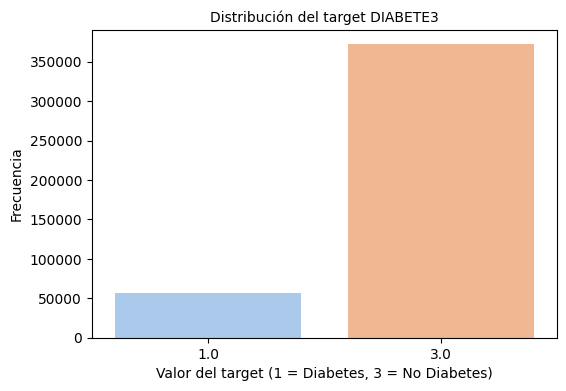

=== 5 filas aleatorias del dataset ===
        GENHLTH  BPHIGH4  BPMEDS  BLOODCHO  HAVARTH3  ADDEPEV2  DIABETE3  SEX  \
22442       3.0      1.0     1.0       1.0       1.0       2.0       3.0  2.0   
340269      4.0      3.0     NaN       1.0       2.0       2.0       3.0  1.0   
202965      2.0      1.0     1.0       1.0       2.0       2.0       3.0  2.0   
130300      5.0      3.0     NaN       1.0       1.0       2.0       3.0  2.0   
153735      2.0      1.0     1.0       1.0       2.0       2.0       3.0  2.0   

        QLACTLM2  USEEQUIP  ...  DIFFDRES  DIFFALON  SMOKE100  EXEROFT1  \
22442        NaN       NaN  ...       NaN       NaN       NaN       NaN   
340269       2.0       2.0  ...       2.0       2.0       2.0     220.0   
202965       2.0       2.0  ...       2.0       2.0       1.0     104.0   
130300       1.0       2.0  ...       1.0       1.0       2.0     101.0   
153735       NaN       NaN  ...       NaN       NaN       NaN       NaN   

        _RACE  _AGEG5YR

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mostrar información general
print("=== Información general del dataset ===")
dataset_pretratado_3.info()
print("\n")

# Resumen estadístico para variables numéricas
print("=== Estadísticas descriptivas ===")
print(dataset_pretratado_3.describe().T)
print("\n")

# Resumen de valores nulos por columna
print("=== Valores nulos por columna ===")
nulos = dataset_pretratado_3.isnull().sum()
pct_nulos = (nulos / len(dataset_pretratado_3) * 100).round(2)
print(pd.DataFrame({"Nulos": nulos, "Porcentaje": pct_nulos}))

# Distribución de la variable target
if 'DIABETE3' in dataset_pretratado_3.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='DIABETE3', data=dataset_pretratado_3, palette='pastel')
    plt.title("Distribución del target DIABETE3", fontsize=10)
    plt.xlabel("Valor del target (1 = Diabetes, 3 = No Diabetes)")
    plt.ylabel("Frecuencia")
    plt.show()

# Ejemplo aleatorio: mostrar 5 filas seleccionadas al azar
print("=== 5 filas aleatorias del dataset ===")
print(dataset_pretratado_3.sample(5, random_state=42))


In [32]:
# Se visualizan los NaN de las variables escogidas para ver cómo proceder
nulls = dataset_pretratado_3.isnull().sum().sort_values(ascending=False)
nulls_pct = ((dataset_pretratado_3.isnull().sum() / len(dataset_pretratado_3)) * 100).sort_values(ascending=False).round(2)

# Mostrar DataFrame con 2 decimales en los porcentajes
df_nulos = pd.DataFrame({"Nulos": nulls, "Porcentaje (%)": nulls_pct})
print(df_nulos)

           Nulos  Porcentaje (%)
BPMEDS    257357           59.94
EXEROFT1  142903           33.28
_VEGESUM   49754           11.59
_FRUTSUM   42573            9.92
_BMI5CAT   35155            8.19
SMOKE100   13903            3.24
DIFFALON   12998            3.03
DIFFDRES   12415            2.89
DIFFWALK   12030            2.80
DECIDE     11456            2.67
BLIND      10887            2.54
USEEQUIP   10180            2.37
QLACTLM2    9114            2.12
GENHLTH        2            0.00
BPHIGH4        1            0.00
HAVARTH3       1            0.00
DIABETE3       0            0.00
BLOODCHO       0            0.00
ADDEPEV2       0            0.00
SEX            0            0.00
_RACE          0            0.00
_AGEG5YR       0            0.00
_PACAT1        0            0.00


In [33]:
# BPMEDS y su relación con BPHIGH (razonado en el documento: 2. Imputación de NaN (datos faltantes))

# Se crea una columna que indique si BPMEDS es nulo
dataset_pretratado_3['BPMEDS_nulos'] = dataset_pretratado_3['BPMEDS'].isna()

# Contar distribución de nulos según BPHIGH4
bphigh_distrib = pd.crosstab(dataset_pretratado_3['BPMEDS_nulos'], dataset_pretratado_3['BPHIGH4'], margins=True, normalize='columns')
print("Distribución de BPMEDS nulos según BPHIGH4:")
print(bphigh_distrib)

Distribución de BPMEDS nulos según BPHIGH4:
BPHIGH4       1.0  2.0  3.0  4.0  7.0  9.0       All
BPMEDS_nulos                                        
False         1.0  0.0  0.0  0.0  0.0  0.0  0.400604
True          0.0  1.0  1.0  1.0  1.0  1.0  0.599396


In [38]:
# Se observa que los NaNs es porque no tiene tensión alta, así que se sustituye por 2 (categoría de NO)
dataset_pretratado_3['BPMEDS'] = dataset_pretratado_3['BPMEDS'].fillna(2)

# Se verifica que no queden NaN en la columna
print("NaN restantes en BPMEDS:", dataset_pretratado_3['BPMEDS'].isna().sum())

# Se elimina la columna creada de los nulos (si existe)
dataset_pretratado_3.drop(columns='BPMEDS_nulos', inplace=True, errors='ignore')

# EXEROFT1 se sigue el mismo procedimiento que en el caso anterior
dataset_pretratado_3['EXEROFT1_nulos'] = dataset_pretratado_3['EXEROFT1'].isna()

# Crosstab para ver relación de nulos en EXEROFT1 con movilidad limitada
for var in ['DIFFALON', 'DIFFDRES', 'DIFFWALK']:
    ct = pd.crosstab(
        dataset_pretratado_3['EXEROFT1_nulos'],
        dataset_pretratado_3[var],
        margins=True,
        normalize='columns'
    ).round(3)  # 🔹 Redondear a 3 decimales
    print(f"\nDistribución de nulos de EXEROFT1 según {var}:")
    print(ct)

# Se concluye que no tiene significado clínico, a diferencia del caso anterior (razonado en el documento: 2. Imputación de NaN)
# Se elimina la columna creada
dataset_pretratado_3.drop(columns='EXEROFT1_nulos', inplace=True, errors='ignore')


NaN restantes en BPMEDS: 0

Distribución de nulos de EXEROFT1 según DIFFALON:
DIFFALON          1.0    2.0    7.0    9.0    All
EXEROFT1_nulos                                   
False           0.432  0.711  0.475  0.181  0.688
True            0.568  0.289  0.525  0.819  0.312

Distribución de nulos de EXEROFT1 según DIFFDRES:
DIFFDRES          1.0    2.0    7.0    9.0    All
EXEROFT1_nulos                                   
False           0.398  0.701  0.436  0.095  0.687
True            0.602  0.299  0.564  0.905  0.313

Distribución de nulos de EXEROFT1 según DIFFWALK:
DIFFWALK          1.0    2.0    7.0    9.0    All
EXEROFT1_nulos                                   
False           0.465  0.734  0.565  0.178  0.686
True            0.535  0.266  0.435  0.822  0.314


In [40]:
# Se observa que los NaNs es porque no tiene tensión alta, así que se sustituye por 2 (categoría de NO)
dataset_pretratado_3['BPMEDS'] = dataset_pretratado_3['BPMEDS'].fillna(2)

# Se verifica que no queden NaN en la columna
print("NaN restantes en BPMEDS:", dataset_pretratado_3['BPMEDS'].isna().sum())

# Se elimina la columna creada de los nulos (si existe)
dataset_pretratado_3.drop(columns='BPMEDS_nulos', inplace=True, errors='ignore')

NaN restantes en BPMEDS: 0


In [41]:
# EXEROFT1 se sigue el mismo procedimiento que en el caso anterior
dataset_pretratado_3['EXEROFT1_nulos'] = dataset_pretratado_3['EXEROFT1'].isna()

# Crosstab para ver relación de nulos en EXEROFT1 con movilidad limitada
for var in ['DIFFALON', 'DIFFDRES', 'DIFFWALK']:
    ct = pd.crosstab(
        dataset_pretratado_3['EXEROFT1_nulos'],
        dataset_pretratado_3[var],
        margins=True,
        normalize='columns'
    ).round(3)  # 🔹 Redondear a 3 decimales
    print(f"\nDistribución de nulos de EXEROFT1 según {var}:")
    print(ct)

# Se concluye que no tiene significado clínico, a diferencia del caso anterior (razonado en el documento: 2. Imputación de NaN (datos faltantes))
# Se elimina la columna creada
dataset_pretratado_3.drop(columns='EXEROFT1_nulos', inplace=True, errors='ignore')

# Como en esta variable hay mas de 33% de valores nulos, se creará una nueva clase para ver, posteriormente como tratarla -> Pasara de float a object
dataset_pretratado_3['EXEROFT1'] = dataset_pretratado_3['EXEROFT1'].fillna('Desconocido')

dataset_pretratado_3.info()


Distribución de nulos de EXEROFT1 según DIFFALON:
DIFFALON          1.0    2.0    7.0    9.0    All
EXEROFT1_nulos                                   
False           0.432  0.711  0.475  0.181  0.688
True            0.568  0.289  0.525  0.819  0.312

Distribución de nulos de EXEROFT1 según DIFFDRES:
DIFFDRES          1.0    2.0    7.0    9.0    All
EXEROFT1_nulos                                   
False           0.398  0.701  0.436  0.095  0.687
True            0.602  0.299  0.564  0.905  0.313

Distribución de nulos de EXEROFT1 según DIFFWALK:
DIFFWALK          1.0    2.0    7.0    9.0    All
EXEROFT1_nulos                                   
False           0.465  0.734  0.565  0.178  0.686
True            0.535  0.266  0.435  0.822  0.314
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429360 entries, 0 to 429359
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   GENHLTH   429358 non-null  float64
 1   BPHIGH4   4